# 📈 Brazilian Stock Risk and Return Analysis

This notebook calculates and visualizes descriptive statistics of daily returns for stocks traded on B3, using the Yahoo Finance API.

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, norm

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)

## 📥 Data Download and Return Calculation

In [3]:
def fetch_and_prepare_data(ticker: str, start="2010-01-01", end=None):
    df = yf.download(ticker, start=start, end=end)
    df = df[["Close"]].rename(columns={"Close": "adjusted_close"})
    df["daily_return"] = df["adjusted_close"].pct_change()
    return df.dropna()

ticker = "BBDC3.SA"
df = fetch_and_prepare_data(ticker)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


## 📈 Descriptive Statistics of Daily Returns

In [4]:
stats = df["daily_return"].describe()
print(f"📈 Daily Return Descriptive Statistics for {ticker}:")
display(stats)

mean = df["daily_return"].mean()
std = df["daily_return"].std()
skewness = skew(df["daily_return"])
kurt = kurtosis(df["daily_return"])

print(f"\n📈 Mean: {mean:.4%}")
print(f"🎢 Standard Deviation: {std:.4%}")
print(f"↔️ Skewness: {skewness:.4f}")
print(f"🚨 Kurtosis: {kurt:.4f}")

📈 Daily Return Descriptive Statistics for BBDC3.SA:


count    3831.000000
mean        0.000494
std         0.020455
min        -0.160126
25%        -0.010611
50%         0.000000
75%         0.011054
max         0.163276
Name: daily_return, dtype: float64


📈 Mean: 0.0494%
🎢 Standard Deviation: 2.0455%
↔️ Skewness: 0.0683
🚨 Kurtosis: 6.9158


## 📊 Daily Returns Distribution


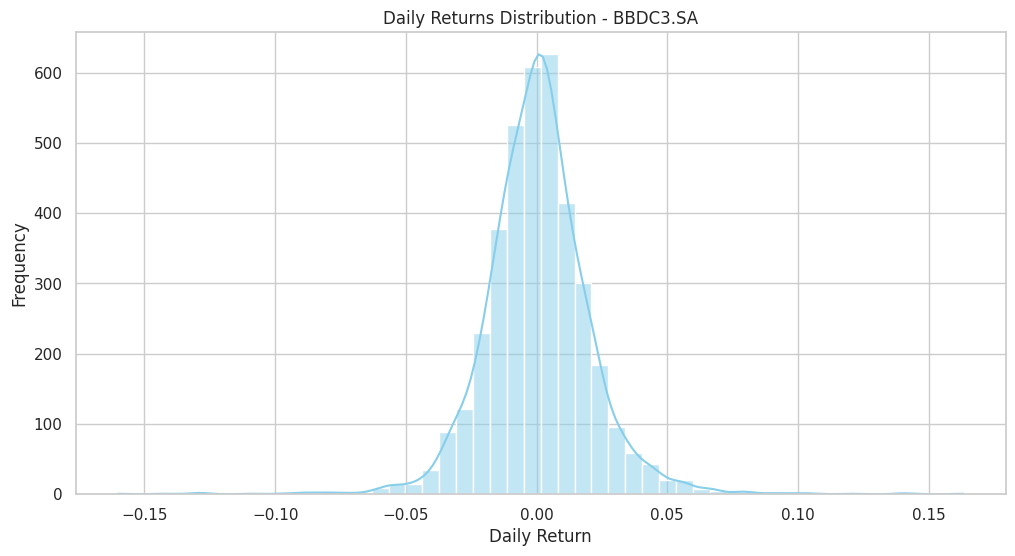

In [5]:
sns.histplot(df["daily_return"], bins=50, kde=True, color="skyblue")
plt.title(f"Daily Returns Distribution - {ticker}")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.show()

The histogram visualizes the distribution of returns, showing a central peak and denser, more extended tails (especially to the left). This confirms the negative skewness and positive kurtosis, indicating a higher risk of extreme losses and that rare events are more frequent than predicted by common models.

## 📊 Risk Metrics: Annualized Volatility and VaR

In [6]:
annual_volatility = df["daily_return"].std() * np.sqrt(252)
confidence_level = 0.95
VaR_95 = np.percentile(df["daily_return"], (1 -  confidence_level) * 100) 
VaR_parametric = norm.ppf(1 - confidence_level, df["daily_return"].mean(), df["daily_return"].std())

print(f"📌 Annualized Volatility: {annual_volatility:.2%}")
print(f"📌 Historical VaR (95%): {VaR_95:.2%}")
print(f"📌 Parametric Normal VaR (95%): {VaR_parametric:.2%}")

📌 Annualized Volatility: 32.47%
📌 Historical VaR (95%): -2.99%
📌 Parametric Normal VaR (95%): -3.32%


**Parametric VaR (95% ~-3.31%)**: This value assumes 'normal' returns and underestimates potential losses in real scenarios (difference of ~0.32%), making Historical VaR more reliable for financial assets with 'fat tails'.



## 📊 Comparison Across Multiple Assets
This code block prepares and displays the returns of multiple assets for comparison, along with their basic statistics.

In [7]:
tickers = ["BBDC3.SA", "ITUB4.SA", "BBAS3.SA"]
returns = {}
all_data = {}

for t in tickers:
    df_temp = fetch_and_prepare_data(t)
    all_data[t] = df_temp
    returns[t] = df_temp["daily_return"]

returns_df = pd.DataFrame(returns).dropna()
display(returns_df.head())
display(returns_df.describe().T[["mean", "std"]].rename(columns={"mean": "Mean", "std": "Standard Deviation"}))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BBDC3.SA,ITUB4.SA,BBAS3.SA
Date,,,
2010-01-05,-0.013772,0.006480,-0.010034
2010-01-06,-0.005891,-0.008667,0.001351
2010-01-07,-0.002304,-0.010243,0.000338
2010-01-08,0.001320,-0.015144,0.005733
2010-01-11,-0.003295,-0.008713,0.007713


,Mean,Standard Deviation
BBDC3.SA,0.000494,0.020455
ITUB4.SA,0.000463,0.019132
BBAS3.SA,0.000651,0.024186


## 📦 Comparative Returns Boxplot

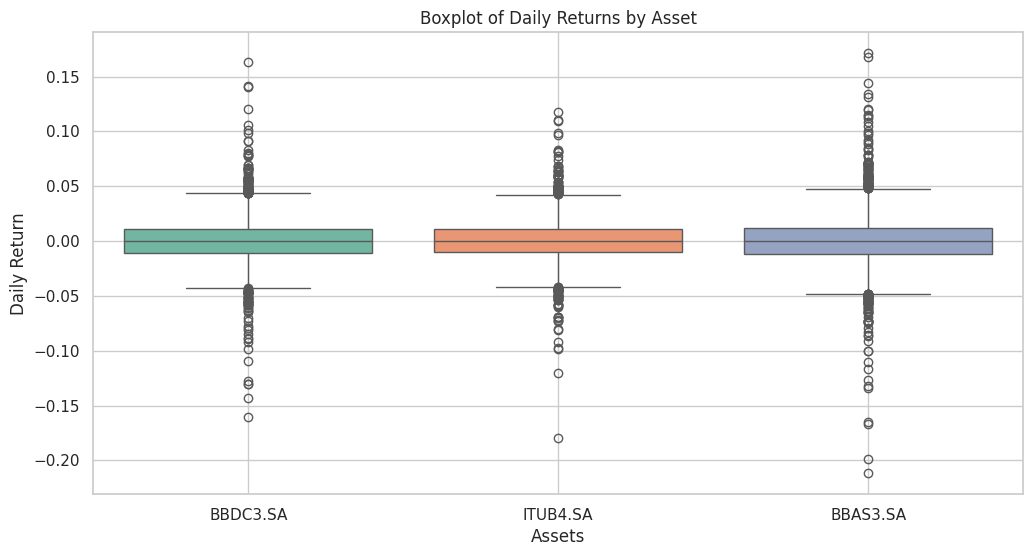

In [10]:
return_melted = returns_df.reset_index().melt(id_vars="Date", var_name="Asset", value_name="Return")
sns.boxplot(data=return_melted, x="Asset", y="Return",hue="Asset", palette="Set2", legend=False)
plt.title("Boxplot of Daily Returns by Asset")
plt.xlabel("Assets")
plt.ylabel("Daily Return")
plt.grid(True)
plt.show()

The three banking assets show very similar risk and volatility profiles, with comparable fluctuations and occurrences of extreme values.

## 🔗 Asset Correlation

In [1]:
correlation_matrix = returns_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Asset Correlation Matrix")
plt.show()

NameError: name 'returns_df' is not defined

The correlations between these assets are extremely high and positive (close to 1.00). This means they move in the same direction, offering little diversification for a portfolio. To reduce risk, assets from other sectors would be needed.

## 📈 Cumulative Capital Growth

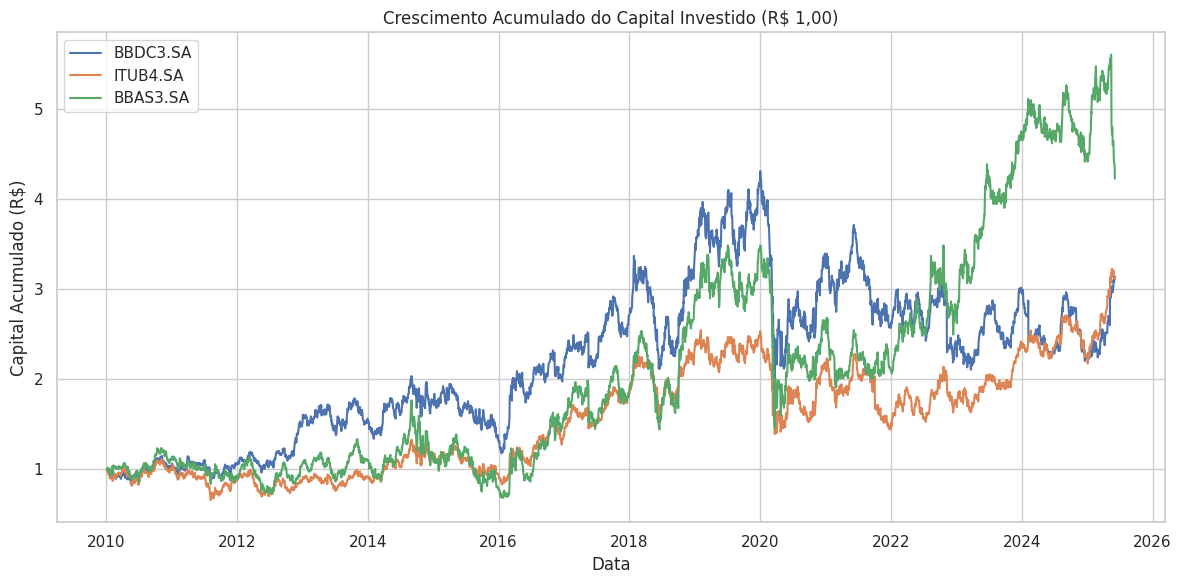

In [ ]:
plt.figure(figsize=(12,6))

for ticker, df in all_data.items():
    cumulative_growth = (1 + df["daily_return"]).cumprod()
    plt.plot(cumulative_growth, label=ticker)

plt.title("Cumulative Growth of Invested Capital (R$ 1.00)")
plt.xlabel("Data")
plt.ylabel("Cumulative Capital (R$)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The growth trajectories of the three banks are remarkably similar, moving in unison. This visually reinforces the low diversification of a portfolio with only these assets, highlighting vulnerability to sectoral shocks.